In [54]:
# How to use Kaggle: https://www.youtube.com/watch?v=Qr9iONLD3Lk

# Source: https://www.youtube.com/watch?v=45ryDIPHdGg

# More info on data: https://archive.ics.uci.edu/ml/datasets/Student+Performance

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 
import pickle

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.utils import shuffle

In [56]:
file_path = r"C:\Users\12489\Documents\Data\student-mat.csv"

df = pd.read_csv(file_path, sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [57]:
# In this case, we aren't keeping all of the columns.
# Remember: numbers are easier to work with 
# (although you can encode strings & make them numeric)

df_slim = df[["G1", "G2", "G3", "studytime", "failures", "absences"]]

# G1: first period grade (from 0 to 20)
# G2: second period grade (from 0 to 20)
# G3: final grade (from 0 to 20 // **output target**)

df_slim.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [58]:
###############################################

In [59]:
label = "G3"

# Label: what we're trying to predict

In [60]:
X = np.array(df_slim.drop([label], 1))
y = np.array(df_slim[label])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

C:\Users\12489\AppData\Local\Temp\ipykernel_17580\3599250930.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df_slim.drop([label], 1))


In [61]:
# Saving your model AND ensuring that it's accurate:

best = 0
for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

    linear = linear_model.LinearRegression()
    linear.fit(X_train, y_train)
    
    accuracy = linear.score(X_test, y_test)

    if accuracy > best:
        best = accuracy
        print(best)
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)


0.7308423440696199
0.8029303478845816
0.9265417998307712


In [62]:
# Using the model that we saved:

pickle_file = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_file)

In [63]:
###########################################

In [64]:
print("Coefficients:", linear.coef_)
# We have five because there are five variables

print("Intercept:", linear.intercept_)

Coefficients: [ 0.16963941  0.97427913 -0.20235377 -0.17975593  0.03968533]
Intercept: -1.6730594954301257


In [65]:
##############################################

In [66]:
# How this works on a real student:

predictions = linear.predict(X_test)

for x in range(len(predictions)):
    print(predictions[x], X_test[x], y_test[x])

6.882892216546448 [ 9  7  2  1 20] 8
14.94408606086695 [13 15  1  0  0] 15
12.59082025550614 [13 13  3  0  0] 13
16.964140658267176 [17 17  4  0  0] 18
12.12626098909548 [14 12  2  1  8] 12
15.330021173274618 [16 15  2  0  2] 15
7.8782210370963295 [7 9 2 0 0] 8
11.728626137490735 [12 12  2  0  2] 11
13.983748862769826 [15 14  3  0  2] 15
11.761340497517974 [11 12  1  0  2] 11
9.180880893321762 [ 8 10  2  0  4] 9
8.657965590955133 [9 9 1 0 6] 10
12.309944049384208 [14 12  1  0  3] 12
8.296870509531239 [9 9 2 0 2] 10
12.8725446801439 [13 13  2  0  2] 13
5.121897559493041 [ 6  6  2  1 13] 8
8.448640854737679 [8 9 1 0 5] 9
9.440789052184405 [10 10  2  0  2] 11
11.854653091035761 [13 12  3  0  6] 12
8.127231101706851 [8 9 2 0 2] 8
15.683262002925924 [16 15  3  0 16] 15
9.18166246099584 [10 10  2  1  0] 0
10.664078251623703 [11 11  2  0  4] 11
3.474551054601161 [6 5 1 3 0] 0
9.148166533294521 [ 9 10  3  0  4] 10
12.78224086421471 [14 12  2  0 20] 13
10.494438843799315 [10 11  2  0  4] 9
10.0

In [67]:
####################################################

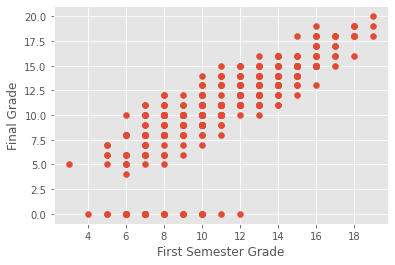

In [70]:
# Visualizing the data

style.use('ggplot') 

# Choose graph-type and your X & y variables
plt.scatter(df_slim["G1"], df_slim["G3"])

plt.xlabel("First Semester Grade")
plt.ylabel("Final Grade")
plt.show()

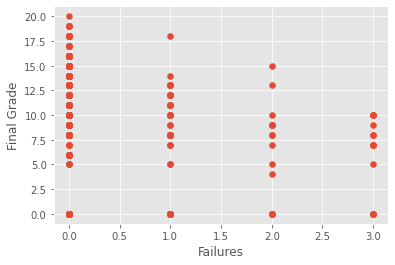

In [71]:
# With this formula, it's easy to graph other variables:

plt.scatter(df_slim["failures"], df_slim["G3"])

plt.xlabel("Failures")
plt.ylabel("Final Grade")
plt.show()